### Multi-variate Linear Regression

#### What is the new hypothesis?
Before starting, let's simply our notation a bit, let's define another variable $x_0=1$ and multiply it with the above equation

$$h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} ...\theta_{n}x_{n}$$

Did that change anything? No. But this helps a lot in writing the equation concisely as follows


$$h_{\theta}(x) = \sum_{i=0}^{i=n}\theta_{i}x_{i} = \theta^{T}X$$

Now, both $\theta$ and $X$ are vectors, and thus, dot product `np.dot()` can be used. Note that $\theta$ and $X$ are $n+1$ dimensional vectors, and $i$ ranges from 0-->n.

#### How does the Error Function change? 

No change in the function, earlier one data point was one feature, now one data point has multiple features.
Use the same MSE loss function.

#### How does the Gradient Descent change for multiple features?

Let's figure out what would be value of $\frac{\partial J}{\partial \theta_{i}}$ for Linear Regression by substiuting the value of $J(\theta)$

$$\frac{\partial J}{\partial \theta_{i}} = \frac{\partial \frac{\sum_{i=1}^{i=m} (h_{\theta}^{i}(x) - y^{i})^2}{2m}}{\partial \theta_{i}} $$

Take the constant $\frac{1}{2m}$ out

$$\frac{\partial J}{\partial \theta_{i}} = \frac{1}{2m} \frac{\partial \sum_{i=1}^{i=m} (h_{\theta}^{i}(x) - y^{i})^2}{\partial \theta_{i}} $$

Take the $\partial$ under the summation

$$\frac{\partial J}{\partial \theta_{i}} = \frac{1}{2m} \sum_{i=1}^{i=m} \frac{\partial (h_{\theta}^{i}(x) - y^{i})^2}{\partial \theta_{i}} $$

Differantiate 
$$\frac{\partial J}{\partial \theta_{i}} = \frac{1}{2m} \sum_{i=1}^{i=m} 2(h_{\theta}^{i}(x) - y^{i}) \frac{\partial (h_{\theta}^{i}(x) - y^{i})}{\partial \theta_{i}} $$

$$\frac{\partial J}{\partial \theta_{i}} = \frac{1}{2m} \sum_{i=1}^{i=m} 2(h_{\theta}^{i}(x) - y^{i}) \frac{\partial ( \sum_{i=0}^{i=n}\theta_{i}x_{i} - y^{i})}{\partial \theta_{i}} $$


$$\frac{\partial J}{\partial \theta_{i}} = \frac{1}{2m} \sum_{i=1}^{i=m} 2(h_{\theta}^{i}(x) - y^{i})x_{i}$$

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("cars24-car-price-clean.csv")

#### How to prepare data for for multivariare linear regression?

In [11]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,make,model,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,Maruti,Alto Std,1,0,1,0,0,0,0,0,1,0,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,Hyundai,Grand i10 Asta,1,0,1,0,0,0,0,0,1,0,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,Hyundai,i20 Asta,1,0,1,0,0,0,0,0,1,0,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,Maruti,Alto K10 2010-2014 VXI,1,0,1,0,0,0,0,0,1,0,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1,0,1,0,0,1,0,0,0,1,0,0


In [12]:
df.make.value_counts()

Maruti           5650
Hyundai          3562
Honda            1779
Mahindra         1276
Toyota           1189
Tata              971
Ford              900
Volkswagen        761
Renault           636
Mercedes-Benz     485
BMW               483
Skoda             422
Chevrolet         406
Audi              324
Nissan            289
Datsun            170
Fiat              113
Jaguar             80
Land               51
Volvo              42
Jeep               41
Mitsubishi         39
Kia                33
Porsche            25
Mini               23
MG                 19
Isuzu              10
Lexus              10
Force               5
Bentley             4
Ambassador          4
OpelCorsa           3
Maserati            2
Premier             2
Daewoo              2
ISUZU               2
DC                  2
Opel                1
Rolls-Royce         1
Mercedes-AMG        1
Lamborghini         1
Ferrari             1
Name: make, dtype: int64

In [65]:
df = df.drop(["make", "model"], axis=1)

#### Get X and Y

In [14]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

#### Convert X and Y from dataframes to numpy array

In [15]:
X = X.to_numpy()
Y = Y.to_numpy()

#### Why should we normalise data?

Each feature must have 0 mean, unit variance

TODO: Add more explaination here

In [16]:
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

#### Normalise the Data

In [17]:
X = (X-u)/std

In [18]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
4,0.137194,-0.544502,0.760085,0.042999,0.010435,0.495818,-0.110946,0.20159,-0.166238,-0.127286,1.014945,-0.020095,-0.056917,-0.975970,0.816926,-0.800710,-0.098382


#### Add x_0 term to the data

In [19]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

#### Check shape of X and Y

In [20]:
print(X.shape, Y.shape)

(19820, 18) (19820,)


### Multivariate Linear Regression implementation using "for" loop

In [21]:
def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=100):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [22]:
import time
start = time.time()
theta, error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  337.33369493484497


It took 521 seconds to run this.

#### What are the learnt parameters?

In [23]:
print(theta)

[ 7.38822664  1.91460061 -0.49032084  0.35908638  1.48882489  4.73153424
 -1.03962742  0.85587115 -0.26400821 -0.26370026  0.06433057  0.05143155
 -0.05861397  0.20742254 -0.08874854  0.0383181  -0.02085462 -0.08824967]


#### How does the error change during training?

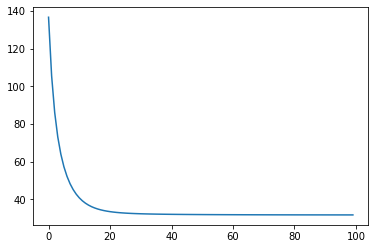

In [24]:
fig = plt.figure()
plt.plot(error_list)
plt.show()

#### What are predictions for the training dataset?

In [25]:
Y_hat = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    Y_hat.append(pred)
Y_hat = np.array(Y_hat)

#### How does the model perform on the training set?

In [26]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [27]:
r2_score(Y,Y_hat)

0.6134216843865016

### How to optmize the code using vectorizaton?

An Efficent Implemenation for Linear Regression using Vectorization

- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like `np.sum()`, `np.dot()` which are quite fast and already optimised

In [28]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=500):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta, error_list

In [29]:
start = time.time()
theta,error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.1750023365020752


In [30]:
print(theta)

[ 7.38842289  1.88476748 -0.47374531  0.32749344  1.15203852  5.07149364
 -0.96643086  0.82449862 -0.28208162 -0.22080249  0.06916548  0.07993341
 -0.05119083  0.20479193 -0.11846699  0.03336637 -0.01609964 -0.08716032]


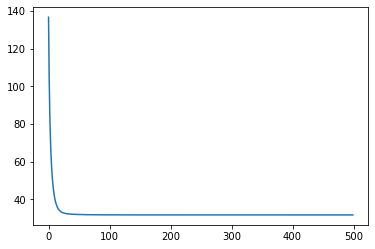

In [31]:
fig = plt.figure()
plt.plot(error_list)
plt.show()

#### How does the model perform ?

In [32]:
Y_hat = hypothesis(X,theta)
r2_score(Y,Y_hat)

0.613825873539432

#### Implementation using sci-kit learn

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df[df.columns.drop('selling_price')]
Y = df["selling_price"] 



In [55]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'transmission_type', 'seats_coupe', 'seats_family', 'seats_large',
       'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_lpg', 'fuel_petrol',
       'seller_dealer', 'seller_individual', 'seller_trustmark dealer'],
      dtype='object')

In [67]:
# Lets scale the data, standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

<ipython-input-67-2724d1b937f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = sc.fit_transform(X[cols])
C:\Users\sci\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [68]:
X.head()

,year,km_driven,mileage,engine,max_power,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
4,0.137194,-0.544502,0.760085,0.042999,0.010435,0.495818,-0.110946,0.20159,-0.166238,-0.127286,1.014945,-0.020095,-0.056917,-0.975970,0.816926,-0.800710,-0.098382


In [69]:
# Train the model 
model.fit(X,Y)

LinearRegression()

In [70]:
print(model.intercept_)
print(model.coef_)

7.38842288799193
[ 1.88489776 -0.47362113  0.32576595  1.14813293  5.0739298  -0.96600933
  0.82443059 -0.28221431 -0.22059749  0.06933032  0.08060625 -0.05072673
  0.20467277 -0.11918639  0.03334649 -0.01608393 -0.08713903]


In [75]:
# Mutiple-R-Squared value 
print("Mutiple R Squared :", model.score(X,Y))

Mutiple R Squared : 0.6138259085441247


### Adjusted R-Squared value 
- The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model. It is calculated as:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [77]:
print("Adjusted R-squared:", 1 - (1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

Adjusted R-squared: 0.6134943784181399


#### Statmodels Linear Regression 

In [72]:
# Statmodels implementation of Linear regression 
import statsmodels.api as sm
X_sm = sm.add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y, X_sm).fit()


In [73]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2249.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:00:54   Log-Likelihood:                -62371.
No. Observations:               19820   AIC:                         1.248e+05
Df Residuals:                   19805   BIC:                         1.249e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Multicollinearity 
- When one or more input variables exhibhit strong correlation 
- One variable is enough to be part of the model. 


In [78]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\sci\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,seats_large,inf
9,fuel_cng,inf
15,seller_individual,inf
14,seller_dealer,inf
13,fuel_petrol,inf
12,fuel_lpg,inf
11,fuel_electric,inf
10,fuel_diesel,inf
16,seller_trustmark dealer,inf
6,seats_coupe,inf


### Note : Vif values tends to be infinity when there is a perfect correlation between the variables 
- Any variable with a VIF of 10 or above is considered strongly correlated with other variables. 

In [80]:
cols2 = ["max_power","transmission_type","year","km_driven","fuel_electric","seats_coupe" ]

In [81]:
# build model without all those correlated columns
X2 = X[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y, X2_sm).fit()

In [82]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5090.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:20:20   Log-Likelihood:                -62556.
No. Observations:               19820   AIC:                         1.251e+05
Df Residuals:                   19813   BIC:                         1.252e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3884      0.04

In [88]:
# Lets drop one more variable -- fuel_electric
cols2 = ["engine","max_power","transmission_type","year","km_driven","seats_coupe" ]

In [89]:
# build model without all those correlated columns
X2 = X[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y, X2_sm).fit()

In [90]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5196.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:24:28   Log-Likelihood:                -62432.
No. Observations:               19820   AIC:                         1.249e+05
Df Residuals:                   19813   BIC:                         1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3884      0.04

In [91]:
vif = pd.DataFrame()
X_t = X2
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,max_power,3.50
0,engine,2.96
2,transmission_type,1.45
4,km_driven,1.17
3,year,1.14
5,seats_coupe,1.03


### Model Testing
-- Model testing should always be performed on unseen dataset as the models will perfrom better on the trained data 

### We have used all the data for training, is it good?
- No we must always evaluate model performance on unseen data. 

In [ ]:
### Train and test split 
from sklearn.model_selection import train_test_split


In [108]:
## X2 is going to split into tran and test 

x_train,x_test,y_train, y_test = train_test_split(X2,Y, test_size=0.1, random_state = 1)

In [109]:
print("Traning set shape X:", x_train.shape)
print("Traning set shape Y:", y_train.shape)
print("Test set shape X:", x_test.shape)
print("Test set shape Y:", y_test.shape)

Traning set shape X: (17838, 6)
Traning set shape Y: (17838,)
Test set shape X: (1982, 6)
Test set shape Y: (1982,)


In [110]:
final_model = LinearRegression()

In [111]:
final_model.fit(x_train,y_train)

LinearRegression()

In [112]:
final_model.intercept_

7.395513670805413

In [113]:
final_model.coef_

array([ 1.10446698,  5.05935657, -0.89690768,  1.98218355, -0.39869078,
        1.01856153])

In [116]:
final_model.score(x_train,y_train)

0.6100390860403653

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [117]:
## predicting the values on test dataset 
y_pred = final_model.predict(x_test)

In [118]:
# Metrics for model performance evaluation 

In [121]:
print("Mean absolute error:", mean_absolute_error(y_test, y_pred) )
print("Mean squared error:",mean_squared_error(y_test, y_pred) )
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, y_pred)) )
print("Mean absolute percentage error:", mean_absolute_percentage_error(y_test, y_pred))

Mean absolute error: 2.8157245895216767
Mean squared error: 27.036450750588255
Root Mean squared error: 5.1996587148185265
Mean absolute percentage error: 0.5821886174802302


### Residual analysis 
- Residuals should follow normal distribution 
- No autocorrelation 
- no heteroscedasticity 

Heteroscedasticity - Constant varinace across errors( variance of erros remain same across the range of predicted values)
- This can be verified using the plot of residuals(errors) Vs. Predicted values 
- Another approach is to perform a whites test(Not required) 

In [123]:
preds = final_model.predict(x_train)
errors = preds - y_train 

In [124]:
import seaborn as sns

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

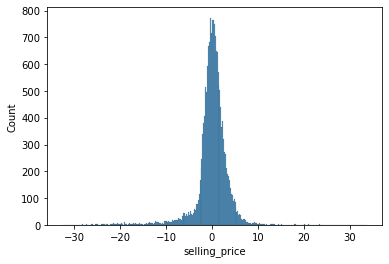

In [146]:
sns.histplot(errors)

C:\Users\sci\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

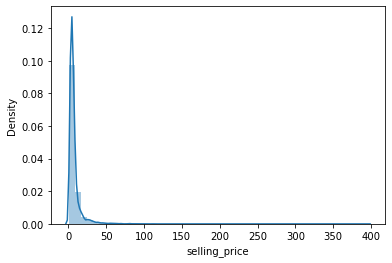

In [127]:
sns.distplot(y_train)

C:\Users\sci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='selling_price'>

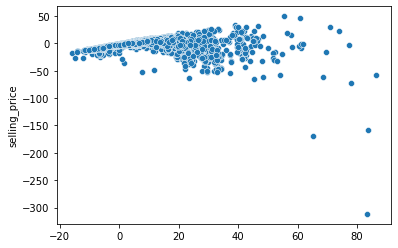

In [128]:
## Plot of residuals vs predicted values 

sns.scatterplot(preds,errors)

In [131]:
## lets remove the outliers and rerun the model 
df3 = df[df["selling_price"] < 50]


In [132]:
df3.shape

(19660, 18)

In [133]:
X = df3[df3.columns.drop('selling_price')]
Y = df3["selling_price"]

In [134]:
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

<ipython-input-134-53e462b909d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = sc.fit_transform(X[cols])
C:\Users\sci\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [135]:
X3 = X[cols2]

In [136]:
x_train,x_test,y_train, y_test = train_test_split(X3,Y, test_size=0.1, random_state = 1)

In [139]:
final_model.fit(x_train,y_train)

LinearRegression()

In [140]:
final_model.score(x_train,y_train)

0.6710324866371689

In [141]:
y_pred = final_model.predict(x_test)

In [142]:
print("Mean absolute error:", mean_absolute_error(y_test, y_pred) )
print("Mean squared error:",mean_squared_error(y_test, y_pred) )
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, y_pred)) )
print("Mean absolute percentage error:", mean_absolute_percentage_error(y_test, y_pred))

Mean absolute error: 2.182956886776027
Mean squared error: 13.182613707826933
Root Mean squared error: 3.6307869268007082
Mean absolute percentage error: 0.46092313646394295


C:\Users\sci\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

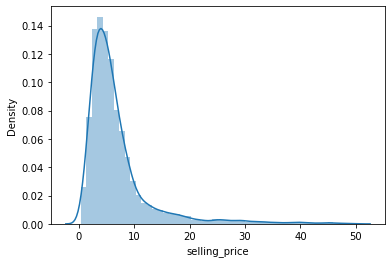

In [143]:
sns.distplot(y_train)

In [144]:
preds = final_model.predict(x_train)
errors = preds - y_train 

Text(0.5, 1.0, 'Histogram of residuals')

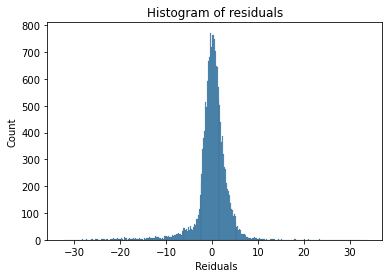

In [149]:
sns.histplot(errors)
plt.xlabel(" Reiduals")
plt.title("Histogram of residuals")

C:\Users\sci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs Residuals')

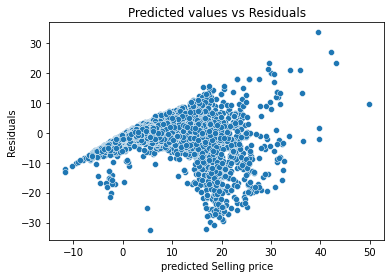

In [150]:
sns.scatterplot(preds,errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

### Still looks like skewed distibution 
- As a next  step apply log transformation on y and bring it close to normal distribution 


### Closed form solution

<div>
<img src="images/nm1.jpg" width="600"/>
</div>

<div>
<img src="images/nm2.jpg" width="600"/>
</div>